# Combined Data Analysis

* In this notebook we blaa blaa blaa


----


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Downloading the Data

In [37]:
ON_df = pd.read_csv('../data/ON_lakeontario_2013-2021.csv')
NY_df = pd.read_csv('../data/NY_lakeontario_2013-2021.csv')

In [38]:
ON_df.head()

,X,Y,MNRF_District,Stocking_Year,Species,Official_Waterbody_Name,Official_French_Waterbody_Name,Unoffcial_Waterbody_Name,Waterbody_Location_Identifier,Geographic_Township,Developmental_Stage,Number_of_Fish_Stocked,Latitude,Longitude,ObjectId
0,-78.106985,43.728679,Lake Ontario Management Unit,2013,Brown Trout,Lake Ontario,lac Ontario,NaN,17-7415-48483,FREDERICKSBURGH,Yearlings,14974,43.728679,-78.106985,5047
1,-78.106985,43.728679,Lake Ontario Management Unit,2013,Brown Trout,Lake Ontario,lac Ontario,NaN,17-7415-48483,FREDERICKSBURGH,Yearlings,9836,43.728679,-78.106985,5048
2,-78.106985,43.728679,Lake Ontario Management Unit,2013,Brown Trout,Lake Ontario,lac Ontario,NaN,17-7415-48483,FREDERICKSBURGH,Yearlings,16960,43.728679,-78.106985,5049
3,-78.106985,43.728679,Lake Ontario Management Unit,2013,Brown Trout,Lake Ontario,lac Ontario,NaN,17-7415-48483,FREDERICKSBURGH,Yearlings,9911,43.728679,-78.106985,5050
4,-78.106985,43.728679,Lake Ontario Management Unit,2013,Brown Trout,Lake Ontario,lac Ontario,NaN,17-7415-48483,FREDERICKSBURGH,Yearlings,11415,43.728679,-78.106985,5051


In [39]:
ON_df['Developmental_Stage'].unique()

array(['Yearlings', 'Fingerlings', 'Adult'], dtype=object)

In [40]:
NY_df.groupby(['Species','Size']).size().reset_index()

,Species,Size,0
0,Brown Trout,3.6,1
1,Brown Trout,3.9,1
2,Brown Trout,5.3,1
3,Brown Trout,7.0,2
4,Brown Trout,7.1,4
...,...,...,...
93,Rainbow Trout,9.5,2
94,Rainbow Trout,9.6,4
95,Rainbow Trout,9.7,2
96,Rainbow Trout,9.8,1


## Combined Data Columns

* Using the common columns:
    1. `year`
    2. `species`
    3. `count`
    4. `country`

In [41]:
NY_df.columns

Index(['Year', 'County', 'Waterbody', 'Town', 'Month', 'Number', 'Species',
       'Size'],
      dtype='object')

In [42]:
NY_by_year_df = NY_df.groupby(['Species', 'Year'])['Number'].sum().reset_index()

In [43]:
NY_by_year_df['Country']='US'

NY_subset_df = NY_by_year_df[['Country', 'Year', 'Species', 'Number']]

### Renaming Columns in Ontario Dataframe

In [59]:
ON_df.columns

Index(['X', 'Y', 'MNRF_District', 'Year', 'Species', 'Official_Waterbody_Name',
       'Official_French_Waterbody_Name', 'Unoffcial_Waterbody_Name',
       'Waterbody_Location_Identifier', 'Geographic_Township',
       'Developmental_Stage', 'Number', 'Latitude', 'Longitude', 'ObjectId'],
      dtype='object')

In [45]:
ON_df = ON_df.rename(columns = { 'Number_of_Fish_Stocked': 'Number',
                         'Stocking_Year': 'Year'})


ON_by_year_df = ON_df.groupby(['Species', 'Year'])['Number'].sum().reset_index()
ON_by_year_df['Country'] = 'Canada'

ON_subset_df = ON_by_year_df[['Country', 'Year', 'Species', 'Number']]

## Creating Combined Dataframe: `combined_df`

In [46]:
combined_df = pd.concat([NY_subset_df, ON_subset_df]).drop_duplicates()

In [47]:
combined_df['Species'].unique()

array(['Brown Trout', 'Chinook', 'Coho', 'Lake Herring (Cisco)',
       'Lake Sturgeon', 'Lake Trout', 'Landlocked Salmon',
       'Rainbow Trout', 'Atlantic Salmon', 'Chinook Salmon'], dtype=object)

In [48]:
fish_name_mapping = {'Chinook Salmon': 'Chinook'}

In [49]:
combined_df['Species'].replace(fish_name_mapping, inplace=True)

## Average Stocking of Each Species Per Year (2013-2021)

In [74]:
combined_df.groupby(['Country', 'Species'])['Number'].mean().unstack()

Species,Atlantic Salmon,Brown Trout,Chinook,Coho,Lake Herring (Cisco),Lake Sturgeon,Lake Trout,Landlocked Salmon,Rainbow Trout
Country,,,,,,,,,
Canada,6750.25,160113.111111,246306.333333,NaN,NaN,NaN,93917.400000,NaN,34614.375
US,NaN,419261.888889,95587.142857,21151.666667,106955.0,3558.25,476533.222222,18406.666667,66245.000


## Total Stocking of Each Species Per Year (2013-2021)

In [51]:
combined_df.groupby(['Country', 'Species'])['Number'].sum().unstack()

Species,Atlantic Salmon,Brown Trout,Chinook,Coho,Lake Herring (Cisco),Lake Sturgeon,Lake Trout,Landlocked Salmon,Rainbow Trout
Country,,,,,,,,,
Canada,27001.0,1441018.0,2216757.0,NaN,NaN,NaN,469587.0,NaN,276915.0
US,NaN,3773357.0,669110.0,126910.0,213910.0,14233.0,4288799.0,165660.0,463715.0


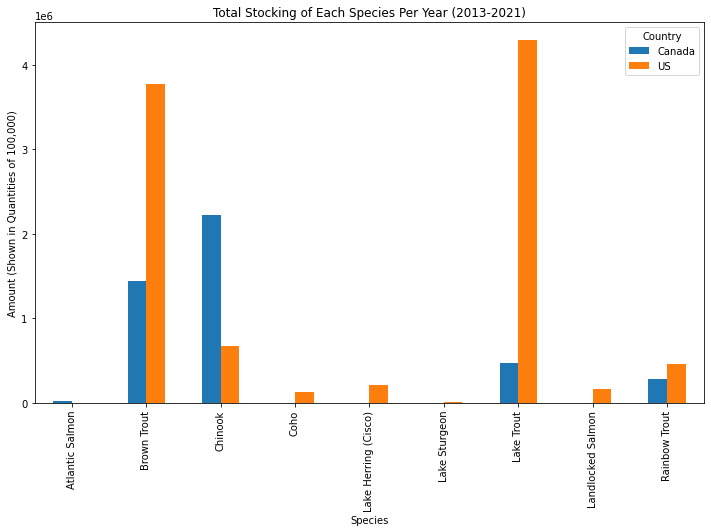

In [98]:
combined_df.groupby(['Species', 'Country'])['Number'].sum().unstack().plot(kind='bar',figsize=(12,7))
plt.title('Total Stocking of Each Species Per Year (2013-2021)')
plt.xlabel('Species')
plt.ylabel('Amount (Shown in Quantities of 100,000)')
plt.show()

This bar graph depicts the total stocking of each fish species from both New York and Ontario. The x axis displays the total of nine species stocked by the US and Canada. The y axis depicts the amount of fish that were stocked in hundreds of thousands.

In species that stocked by both New York and Ontario –– we can see a blue bar representing Canada and an orange bar representing the US –– next to each other. The four stocking fish that the countries have in common are Brown Trout, Chinook Salmon, Lake Trout, and Rainbow Trout.

### Extracting Species US and Canada Have in Common
    1. Brown Trout
    2. Chinook
    3. Lake Trout
    4. Rainbow Trout

In [53]:
species_to_use = ['Brown Trout', 'Chinook', 'Lake Trout', 'Rainbow Trout']

In [54]:
species_filter = combined_df['Species'].isin(species_to_use)

In [55]:
combined_filtered_df = combined_df[species_filter].drop_duplicates()

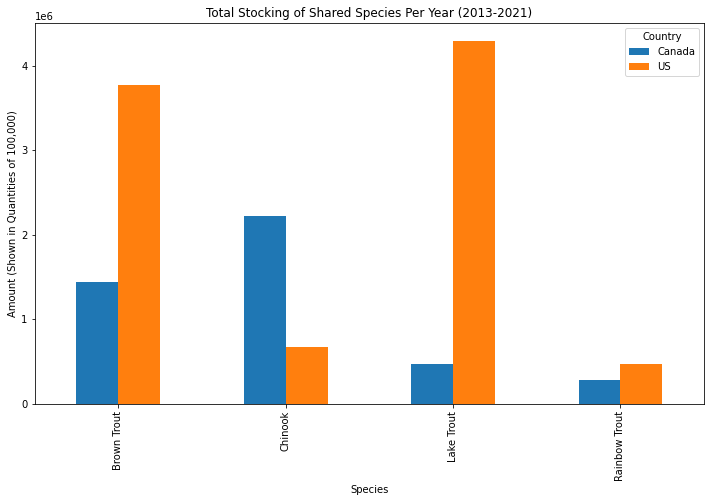

In [100]:
combined_filtered_df.groupby(['Species', 'Country'])['Number'].sum().unstack().plot(kind='bar',figsize=(12,7))
plt.title('Total Stocking of Shared Species Per Year (2013-2021)')
plt.xlabel('Species')
plt.ylabel('Amount (Shown in Quantities of 100,000)')
plt.show()

This bar graph depicts the total stocking of each of the shared species between New York and Ontario. The x axis shows the total of four shared species which are Brown Trout, Chinook Salmon, Lake Trout, and Rainbow Trout. The y axis depicts the amount of fish that were stocked in hundreds of thousands in Lake Ontario. A blue bar represents Canada and an orange bar represents the US.

In each of the four species we can see that one country always out-stocks the other. Brown Trout, Lake Trout, and Rainbow Trout are all stocked more by the US. The only species that is stocked more by Canada are the Chinook Salmon. Of all four species, Lake Trout is the fish stocked the most by the US--surpassing 400,000 fish. Of the four species, Canada is responsible for stocking the most Chinook Salmon--surpassing 200,000 fish. However, overall Lake Trout is the most stocked fish between the two countries.

### Patterns over time

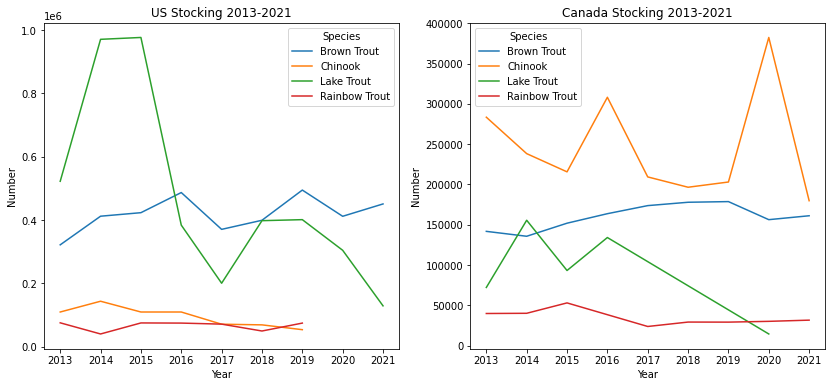

In [ ]:
US = combined_filtered_df['Country']=='US'


fig, ax = plt.subplots(1,2, figsize=(14,6))

sns.lineplot(x='Year', y='Number', hue='Species', 
             data=combined_filtered_df[US], ax=ax[0])


sns.lineplot(x='Year', y='Number', hue='Species', 
             data=combined_filtered_df[-US], ax=ax[1])

ax[0].set_title('US Stocking 2013-2021')
ax[1].set_title('Canada Stocking 2013-2021')

plt.show()

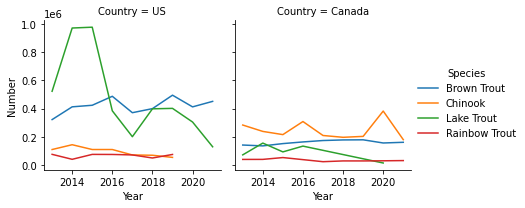

In [114]:
g=sns.FacetGrid(hue='Species', col='Country', data=combined_filtered_df)
g.map_dataframe(sns.lineplot, x='Year', y='Number')
g.add_legend()

ax[0].set_title('US Stocking 2013-2021')
ax[1].set_title('Canada Stocking 2013-2021') ##? cant insert title or make bigger

plt.show()

A side by side comparison shows the amount each of the four shared species are stocked by the US and Canada. 

The line graph on the left shows the amount of Brown Trout, Chinook, Lake Trout, and Rainbow Trout stocked across the years in the US. During the years of 2013 and 2015, the US stocked Lake Trout more than the other three species before taking a sharp decrease in 2015 through 2017. The amount of Lake Trout stocked began increasing again in 2017, but never jumped back to its original amounts. Instead, Lake Trout once again, begins a decrease pattern in 2019, unlike any other of the other three species. Since dipping below Brown Trout in 2016, Lake Trout has yet to out-stock Brown Trout once again. Brown Trout stocking in the US has a more consistent pattern compared to Lake Trout with occasional spikes and what seems like a slow but steady increase across the years. Chinook, and Rainbow Trout are the amount least stocked in the US and seem to stick to a consistent pattern throughout the years, until stopping in 2019.

The line graph on the right shows the amount of Brown Trout, Chinook, Lake Trout, and Rainbow Trout stocked across the years in Canada. Across the board, there is less distribution/outliers of amount stocked between the four species--all four species stick closer together. Still, Chinook is the species most stocked in Canada and also seems to experience the most fluctuation out of the four, with peaks in 2016 and 2020. By the end of 2021, amount of Chinook stocked in Canada has reached its lowest point since 2013. Brown Trout seems to consistently be the second largest amount of fish stocked, but experiences a much more steady pattern across the years, with only a minimal amount increase by the end of 2021. Rainbow Trout remained to be the least stocked species in Canada, with a very stable pattern of stocking, until 2020. In 2020, Lake Trout dipped below Rainbow Trout as Canada terminated Lake Trout stocking.

When comparing US and Canada, Rainbow Trout in both countries are the species most similarly stocked. While the US has terminated their stocking of Rainbow Trout and Chinook, Canada continues to stock both fish in their usual pattern. Additionally, while Canada has terminated stocking of Lake Trout, the US continues to stock Lake Trout, but with an evident decrease.